### Getting the Dependencies

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

### Getting the dataset / EDA

In [2]:
loan_df = pd.read_csv('Loan_status_Dataset')

loan_df.head()

Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0         Urban           Y  
3             1.0         Urban           Y  
4             1.0         Urban           Y

In [3]:
loan_df.shape

(614, 13)

In [4]:
loan_df.size

7982

In [5]:
loan_df.describe()

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  592.000000         600.00000   
mean       5403.459283        1621.245798  146.412162         342.00000   
std        6109.041673        2926.248369   85.587325          65.12041   
min         150.000000           0.000000    9.000000          12.00000   
25%        2877.500000           0.000000  100.000000         360.00000   
50%        3812.500000        1188.500000  128.000000         360.00000   
75%        5795.000000        2297.250000  168.000000         360.00000   
max       81000.000000       41667.000000  700.000000         480.00000   

       Credit_History  
count      564.000000  
mean         0.842199  
std          0.364878  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000

In [6]:
loan_df.count()        #Gets the non NaN values count in each column

Loan_ID              614
Gender               601
Married              611
Dependents           599
Education            614
Self_Employed        582
ApplicantIncome      614
CoapplicantIncome    614
LoanAmount           592
Loan_Amount_Term     600
Credit_History       564
Property_Area        614
Loan_Status          614
dtype: int64

In [7]:
loan_df.isnull().sum()         #Gets the missing value count in each column.

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
loan_df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

## Handling missing values

In [9]:
#Droping non imputable and rows with less NaN values (ie, we are dropping all rows with NaN)

loan_df.dropna(inplace= True)

In [10]:
loan_df.shape              #No. of rows have decreased

(480, 13)

In [11]:
#Now, checking if there is any missing value in any coluumn.

loan_df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Feature selection

In [12]:
#Droping Loan_ID column as it is playing no role in prediction.

loan_df = loan_df.drop(columns='Loan_ID')

loan_df.head()

Gender Married Dependents     Education Self_Employed  ApplicantIncome  \
1   Male     Yes          1      Graduate            No             4583   
2   Male     Yes          0      Graduate           Yes             3000   
3   Male     Yes          0  Not Graduate            No             2583   
4   Male      No          0      Graduate            No             6000   
5   Male     Yes          2      Graduate           Yes             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

  Property_Area Loan_Status  
1         Rural           N  
2         Urban           Y  
3         Urban           Y  
4         Urban           Y  
5         Urban           Y

## Replacing categorical data to Numerical data 

In [13]:
loan_df['Dependents'].value_counts()               #Need to change '3+' to numeric value for better model training

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [14]:
loan_df.dtypes                   #Dependent is object type

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [15]:
#Getting the type of value in Dependents column

val = loan_df.loc[1, 'Dependents']
print(type(val))                                  #It's a string type
val                                                  

<class 'str'>


'1'

In [16]:
#Replacing '3+' with a numerical value using rename() method

loan_df.replace({'Dependents': {'0': 0, '1': 1, '2': 2, '3+': 4}}, inplace= True)

val = loan_df.loc[1, 'Dependents']
print(type(val))                                  #It's an int type
val                                                

<class 'numpy.int64'>


1

In [17]:
loan_df['Dependents'].value_counts()

0    274
2     85
1     80
4     41
Name: Dependents, dtype: int64

### Replacing all object dtype columns to numberical value:

In [18]:
#Checking different categorical values.

loan_df['Gender'].value_counts()

Male      394
Female     86
Name: Gender, dtype: int64

In [19]:
loan_df['Married'].value_counts()

Yes    311
No     169
Name: Married, dtype: int64

In [20]:
loan_df['Education'].value_counts()

Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [21]:
loan_df['Self_Employed'].value_counts()

No     414
Yes     66
Name: Self_Employed, dtype: int64

In [22]:
loan_df['Property_Area'].value_counts()

Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [23]:
loan_df.replace({'Gender': {'Male': 1, 'Female':0}, 'Married': {'Yes': 1, 'No': 0}, 
                 'Education': {'Graduate': 1, 'Not Graduate': 0}, 'Self_Employed': {'Yes': 1, 'No': 0}, 
                 'Property_Area': {'Rural': 0, 'Semiurban': 1, 'Urban': 2} }, inplace= True )

In [24]:
loan_df.head()

Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   
5       1        1           2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area Loan_Status  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y  
5              2           Y

## Splitting the Dataset into train and test

In [25]:
X = loan_df.iloc[:, :-1]

print(X.shape)
print(X.isna().sum())

(480, 11)
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [26]:
Y = loan_df['Loan_Status']            #Gets the Dataframe object of output data
 
Y

1      N
2      Y
3      Y
4      Y
5      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 480, dtype: object

In [27]:
#Splitting 

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state=4, stratify=Y)

In [28]:
X_train.shape

(384, 11)

In [29]:
X_test.shape

(96, 11)

In [30]:
Y_train.shape

(384,)

In [31]:
Y_test.shape

(96,)

## Label Encoding

In [32]:
label_encoder = LabelEncoder()

In [33]:
y_train_label = label_encoder.fit_transform(Y_train)

print(y_train_label.shape)
y_train_label

(384,)


array([1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,

In [34]:
y_test_label = label_encoder.transform(Y_test)

print(y_test_label.shape)
y_test_label

(96,)


array([1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0])

In [35]:
#Creating the dataframe of encoded training labels

y_train_label_df = pd.DataFrame(y_train_label)

y_train_label_df.value_counts()

1    266
0    118
dtype: int64

In [36]:
#Creating the dataframe of encoded testing labels

y_test_label_df = pd.DataFrame(y_test_label)

y_test_label_df.value_counts()

1    66
0    30
dtype: int64

## Data Visualization

In [37]:
loan_df.head()


Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
1       1        1           1          1              0             4583   
2       1        1           0          1              1             3000   
3       1        1           0          0              0             2583   
4       1        0           0          1              0             6000   
5       1        1           2          1              1             5417   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   
5             4196.0       267.0             360.0             1.0   

   Property_Area Loan_Status  
1              0           N  
2              2           Y  
3              2           Y  
4              2           Y  
5              2           Y

<AxesSubplot:xlabel='Education', ylabel='count'>

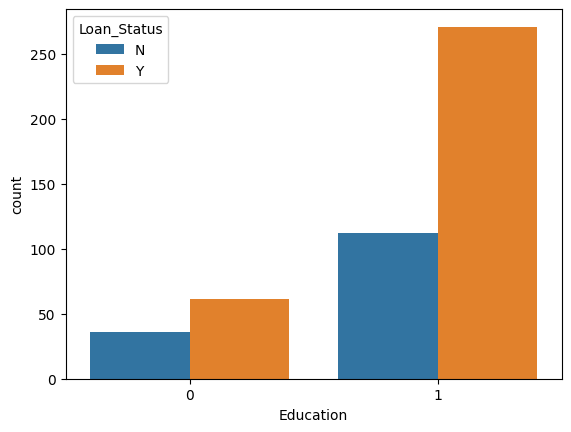

In [38]:
#Getting visualization of Education and loan status

sns.countplot(data= loan_df, x= 'Education', hue= 'Loan_Status')      #Observe that more graduated people have got the loan.

<AxesSubplot:xlabel='Married', ylabel='Count'>

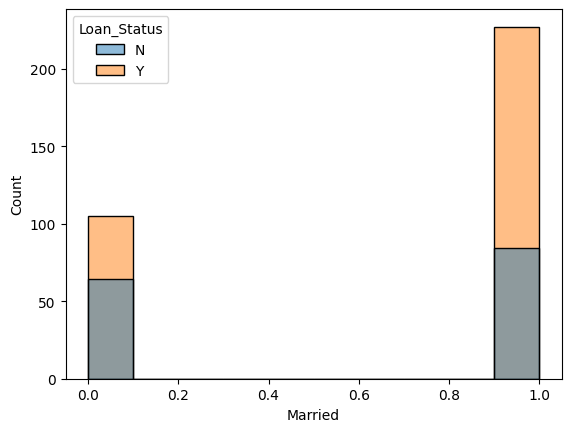

In [39]:
#Checking relationship b/w married and loan status approval.

sns.histplot(data= loan_df, x='Married', hue= 'Loan_Status')                 #More married people are getting loans.

<AxesSubplot:xlabel='Gender', ylabel='Count'>

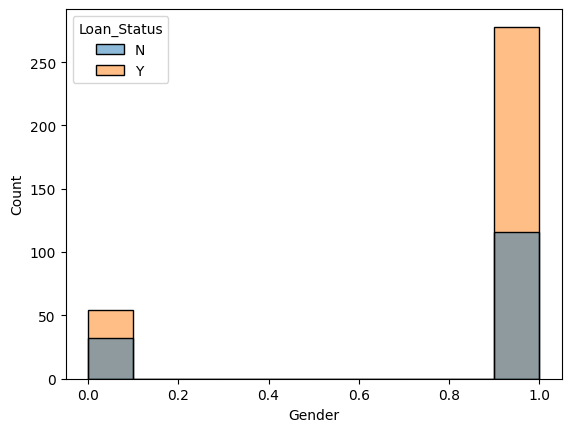

In [40]:
#Relationship b/w gender and loan status approval.

sns.histplot(data= loan_df, x= 'Gender', hue= 'Loan_Status')              #More males are getting loan.

<AxesSubplot:xlabel='Dependents', ylabel='Count'>

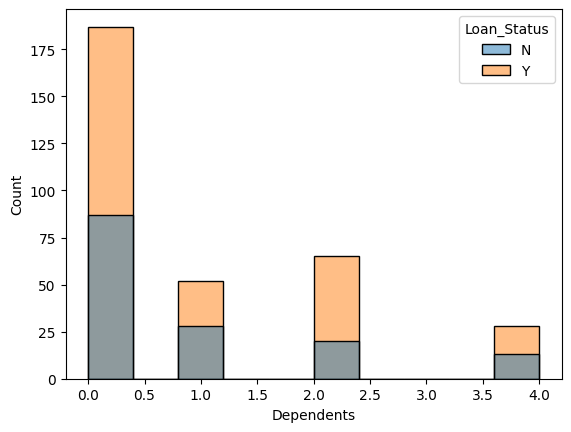

In [41]:
#Relationship b/w Dependents and loan status approval.

sns.histplot(data= loan_df, x= 'Dependents', hue= 'Loan_Status')              #People with 0 dependents have high chance of loan

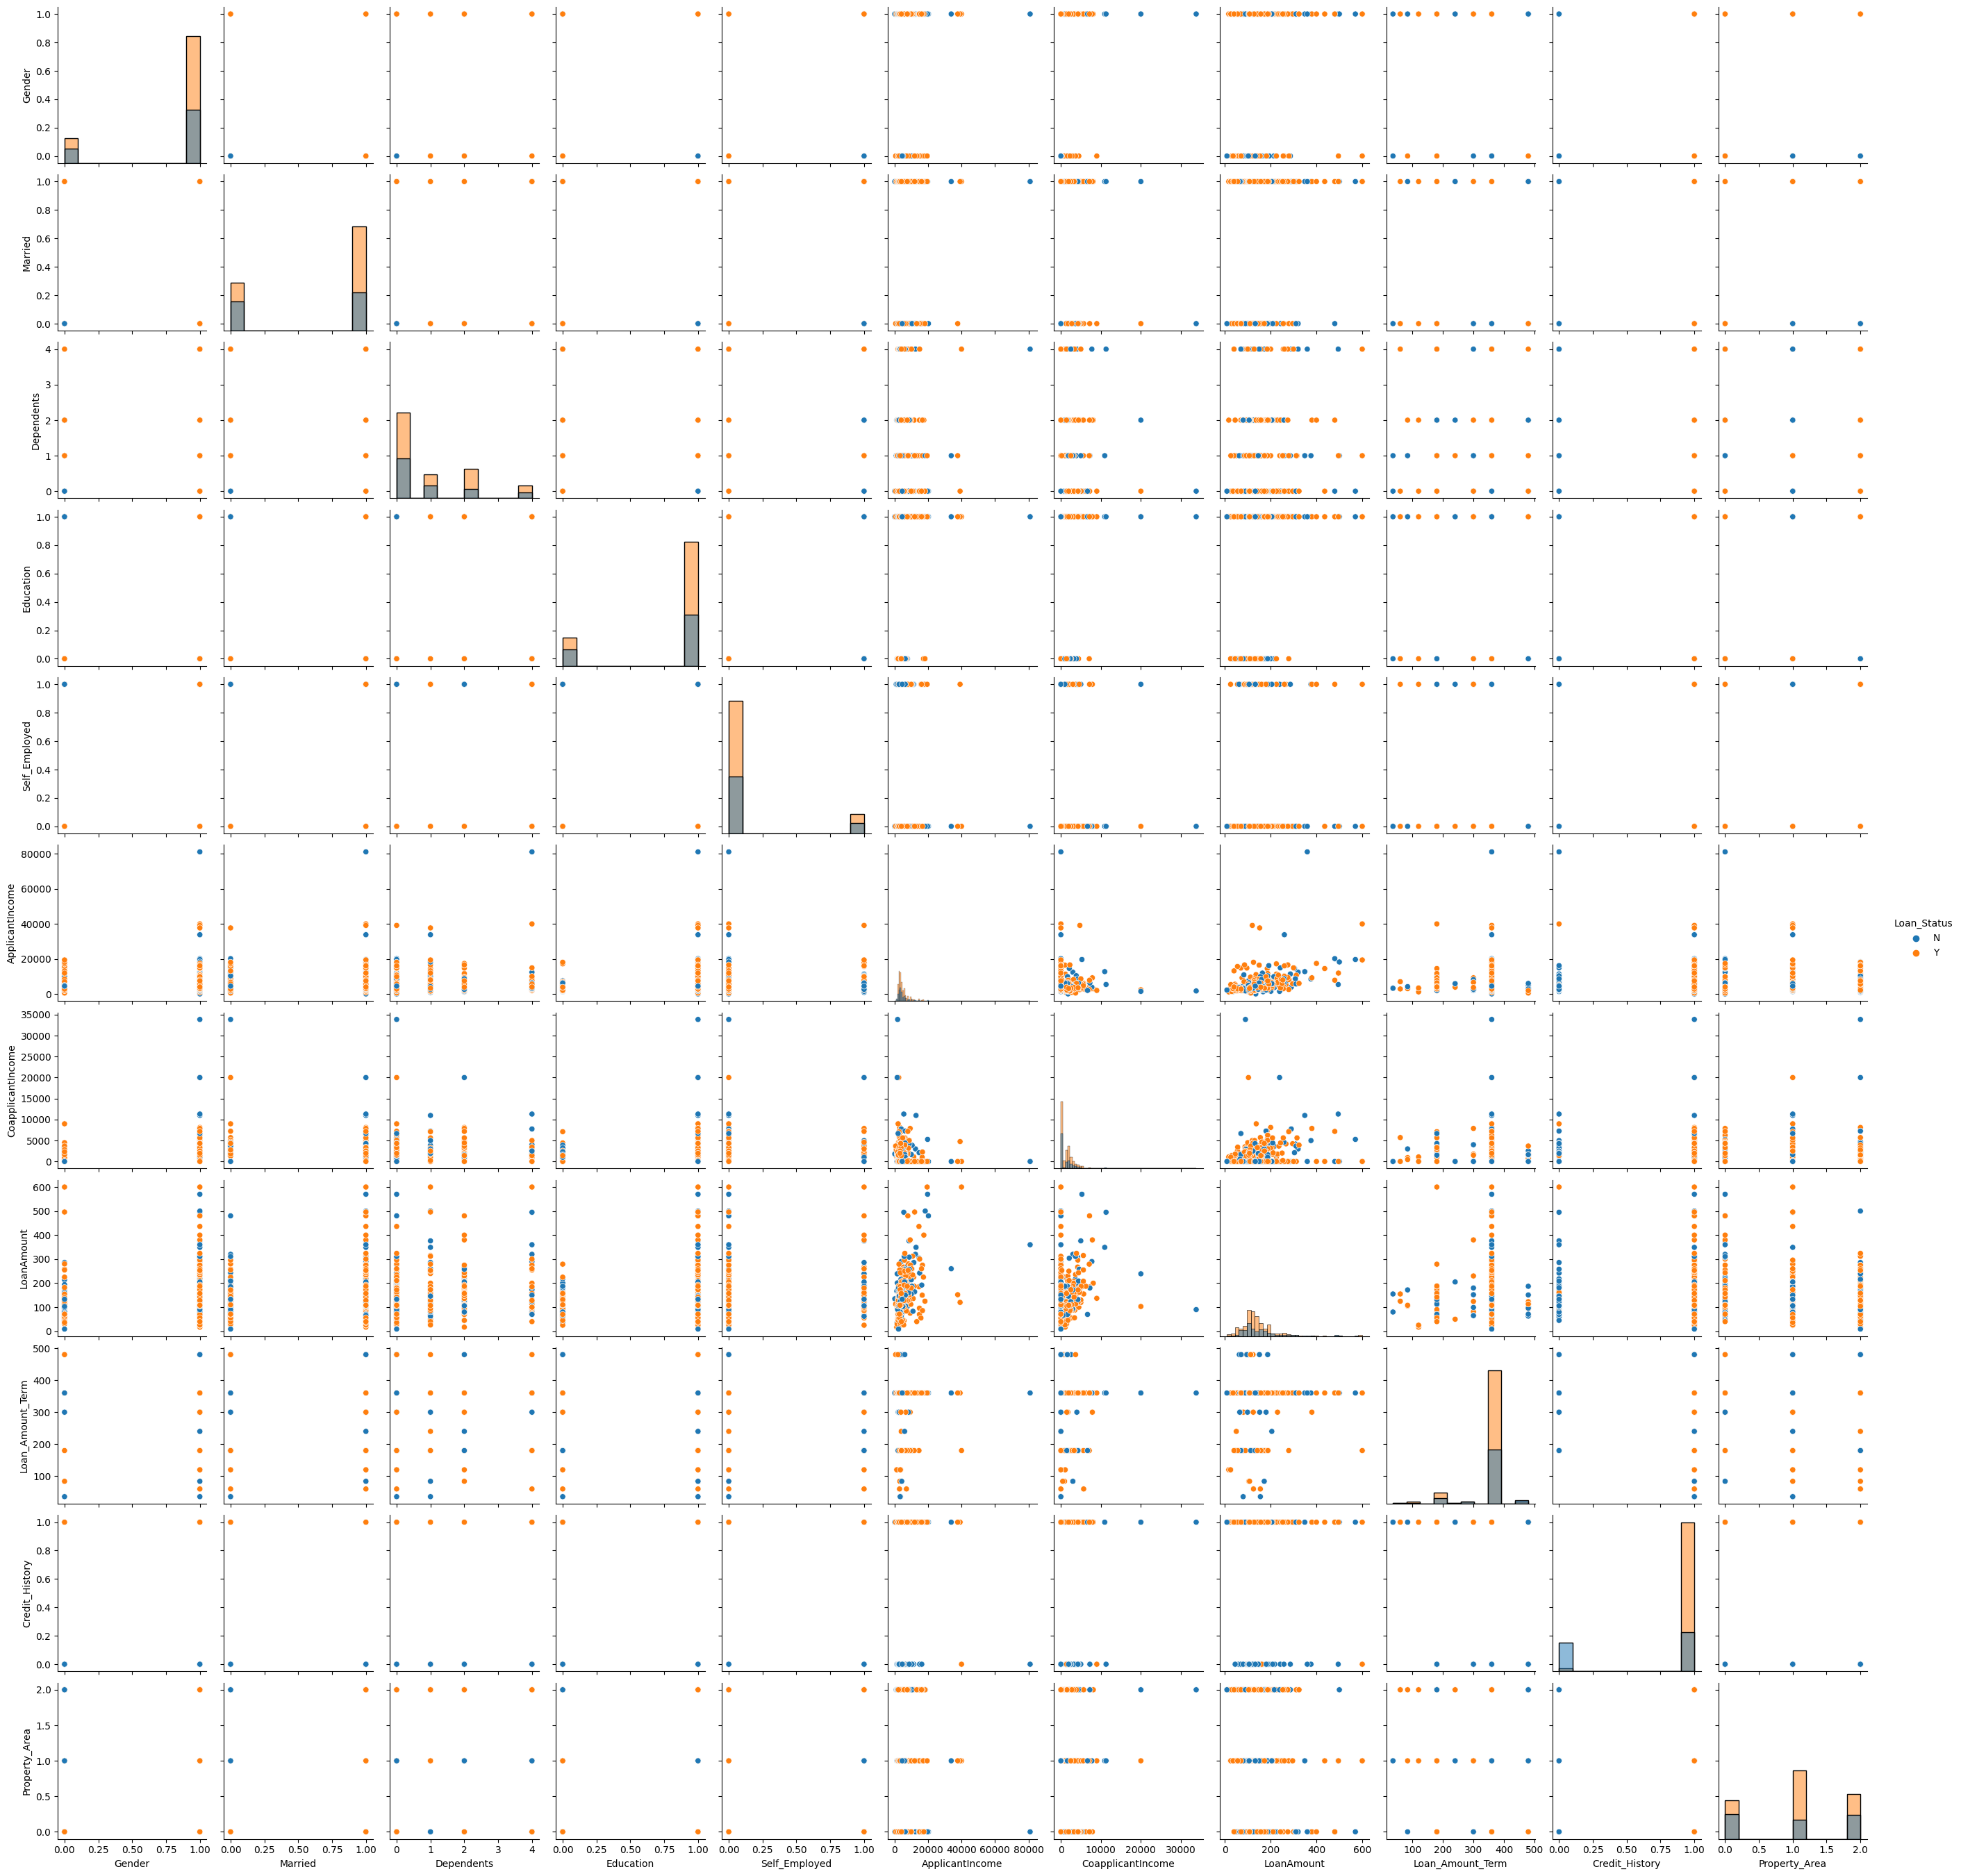

In [42]:
#Creating a pairplot which takes all column of numerical dtype from data(arg) in both the axes (x and y)

sns.pairplot(data=loan_df, hue= 'Loan_Status', diag_kind='hist')

In [43]:
loan_df.dtypes

Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int64
Loan_Status           object
dtype: object

# Training Model 

## Support Vector Machine Model

In [44]:
#creating a classifier object based on Support vector classification.

classifier = svm.SVC(kernel= 'linear')

In [45]:
#Converting pandas dataframe object ot numpy ndarray, as below fit() method accepts array like objects only.

x_train = X_train.to_numpy()
x_test = X_test.to_numpy()

In [46]:
classifier.fit(x_train, y_train_label)

SVC(kernel='linear')

In [47]:
#Getting prediction on training data:

X_train_prediction = classifier.predict(x_train)

In [48]:
#Checking accuracy score on training data:

X_train_accuracy = accuracy_score(y_true= y_train_label, y_pred= X_train_prediction)

print('Accuracy score on  training data:', X_train_accuracy)

Accuracy score on  training data: 0.7838541666666666


In [49]:
#Getting prediction on testing data:

X_test_prediction = classifier.predict(x_test)

In [50]:
#Checking accuracy score on testing data:

X_test_accuracy = accuracy_score(y_true= y_test_label, y_pred= X_test_prediction)

print('Accuracy score on testingg data:', X_test_accuracy)

Accuracy score on testingg data: 0.78125


## Naive Bayes model 

In [51]:
#Importing dependency for Naive Bayes algorithm

from sklearn.naive_bayes import GaussianNB

In [52]:
#Creating an object based on Naive Bayes algorithm

naive_model = GaussianNB()

In [53]:
#Training our model

naive_model.fit(x_train, y_train_label)

GaussianNB()

In [54]:
#Getting prediction on training data

train_pred = naive_model.predict(x_train)

In [55]:
#Getting accuracy of our model

train_data_accuracy = accuracy_score(y_train_label, train_pred)

print('Accuracy score of training data prediction:', train_data_accuracy)

Accuracy score of training data prediction: 0.796875


In [56]:
#Getting prediction on testing data

test_pred = naive_model.predict(x_test)

In [57]:
#Getting accuracy of our model

test_data_accuracy = accuracy_score(y_test_label, test_pred)

print('Accuracy score of testing data prediction:', test_data_accuracy)

Accuracy score of testing data prediction: 0.8229166666666666


## Logistic Regression based Model

In [58]:
#Handling dependency

from sklearn.linear_model import LogisticRegression

In [59]:
#Creating object based on Logistiic regression algorithm for our model

model = LogisticRegression(solver='saga')

In [60]:
#Training our model

model.fit(x_train, y_train_label)

C:\Users\aksha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='saga')

In [61]:
#Getting prediction on training data

train_data_pred = model.predict(x_train)

In [62]:
#Checking the accuracy score of our model on training data

train_data_accuracy = accuracy_score(y_train_label, train_data_pred)

print('Accuracy score of training data prediction:', train_data_accuracy)

Accuracy score of training data prediction: 0.6927083333333334


In [63]:
#Getting prediction on testing data

test_data_pred = model.predict(x_test)

In [64]:
#Checking the accuracy score of our model on testing data

test_data_accuracy = accuracy_score(y_test_label, test_data_pred)

print('Accuracy score of testing data prediction:', test_data_accuracy)

Accuracy score of testing data prediction: 0.6875


## Saving the trainined model by serializing using pickle module


In [65]:
import pickle

In [66]:
filename = "trained_model.sav"

In [67]:
#dump() method allow us to save the serialized object into a file, whereas dumps() method create a bytestring of respective object

pickle.dump(naive_model, open(filename, 'wb'))            

#We are passing the trained model object (model) to get serialized and saved in trained_model.sav file

In [68]:
#Loading the saved serialized model just for demo (9deserializing)

loaded_model = pickle.load(open(filename, 'rb'))

In [69]:
#Checking accuracy using the the deserialized model

x_test_pred = loaded_model.predict(x_test)

x_test_acc = accuracy_score(y_test_label, x_test_pred)

x_test_acc

0.8229166666666666